In [1]:
#5.1

#化为标准型
from scipy.optimize import linprog
import numpy as np
c= [-8,2,-3,1,2]
A= [[1,1,1,1,1],[1,2,2,1,6],[2,1,6,0,0],[0,0,1,1,5]]
b= [[400],[800],[200],[200]]
LB= [0,0,0,0,-10]
UB =[99,99,99,99,None]
bound = tuple(zip(LB,UB))
res = linprog(c,A,b,None,None,bound)
print('目标函数最大值:',-res.fun)
print('最优解',res.x)
print('最优解',np.round(res.x,decimals=2))#保留两位有效数字后的结果

目标函数最大值: 812.9999732402549
最优解 [ 9.89999977e+01  7.60795655e-07  3.33332599e-01  2.30736857e-06
 -9.99999896e+00]
最优解 [ 99.     0.     0.33   0.   -10.  ]


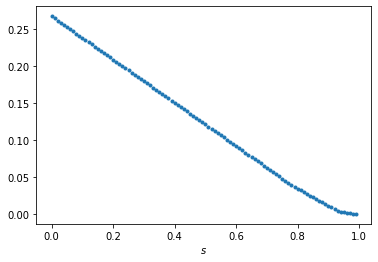

In [5]:
#5.2

#投资收益问题的第3种求解
#s从0到1以0.01步长递进
#模型三中是通过max（最大化收益-最小化风险）来实现最终的需求，之后化为min标准化模型
#linprog
from scipy.optimize import *
import matplotlib.pyplot as plt
A=[[0,0.025,0,0,0,-1],[0,0,0.15,0,0,-1],[0,0,0,0.55,0,-1],[0,0,0,0,0.026,-1]]
b=[0,0,0,0]
Aeq=[[1,1.01,1.02,1.045,1.065,0]]
beq=[1]
bound=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None))
s=0;ss=[];aa=[]
while s<=1:
    c=[-(1-s)*0.05,-(1-s)*0.27,-(1-s)*0.19,-(1-s)*0.185,-(1-s)*0.185,s]
    res=linprog(c,A,b,Aeq,beq)
    ss.append(s);aa.append(-res.fun)# 此处求最大化收益-最小化风险
    s=s+0.01
plt.plot(ss,aa,'.')
plt.xlabel('$s$')
plt.show()
#从图中可见，整体的收益率呈现直线下降的趋势，s是极小化风险的系数，（1-s）最大化投资收益的系数
#表明风险系数越高，整体的收益越少

In [8]:
#5.3

'''
协方差矩阵的对角线，即是购买该公司股票可能造成的损失率
固定盈利水平，求风险系数
x[i]表示对第i家公司进行投资比例，i= 0,2,3...5
    目标函数:将最小化风险即min{max (q[i]*x[i])}\
         设定x[n+1] = max(q[i]*x[i])
    约束条件：q[i]*x[i]<=x[n+1]
            投资和 = 1
            收益 >= 0.25
'''
#linprog
from scipy.optimize import *
c=[0,0,0,0,0,0,1]
A=[[-20,-42,-100,-50,-46,-30,0],[0.032,0,0,0,0,0,-1],[0,0.1,0,0,0,0,-1],
[0,0,0.333,0,0,0,-1],[0,0,0,0.125,0,0,-1],
[0,0,0,0,0.065,0,-1],[0,0,0,0,0,0.08,-1]]
b=[25,0,0,0,0,0,0]
Aeq=[[1,1,1,1,1,1,0]]
beq=[1]
bound=((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,None))
res=linprog(c,A,b,Aeq,beq,bound)
print("最小风险:",res.fun)
print('对各家公司的投资比例',res.x)

最小风险: 0.012478538955620911
对各家公司的投资比例 [0.38995427 0.12478533 0.03747303 0.09982825 0.19197745 0.15598168
 0.01247854]


In [12]:
#5.4

#和5.3中协方差矩阵表格有点相似，都是1对多形式，生产甲乙丙都需要ABC三种原料，所以3*3需要9个参数
#生产每一类糖果的量，都是相应ABC原料的和
#linprog
from scipy.optimize import *
import numpy as np
c=[-0.9,-0.45,0.05,-1.4,-0.95,-0.45,-1.9,-1.45,-0.95]
A=[[-0.4,0,0,0.6,0,0,0.6,0,0],[0,-0.7,0,0,0.3,0,0,0.3,0],[-0.2,0,0,-0.2,0,0,0.8,0,0],[0,-0.5,0,0,-0.5,0,0,0.5,0],
   [0,0,-0.6,0,0,-0.6,0,0,0.4],[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1]]
b=[0,0,0,0,0,2000,2500,1200]
bound=((0,2000),(0,2000),(0,2000),(0,2500),(0,2500),(0,2500),(0,1200),(0,1200),(0,1200))
res=linprog(c,A,b,None,None,bound)
print('各个牌号的用量为：',np.round(res.x,2))
a=np.array(np.reshape(res.x,(3,3)))
print("应生产糖果\n甲:%.0f千克"%(a[0,0]+a[1,0]+a[2,0]))
print("乙:%.0f千克"%(a[0,1]+a[1,1]+a[2,1]))
print("丙:%.0f千克"%(a[0,2]+a[1,2]+a[2,2]))

各个牌号的用量为： [ 580.   1420.      0.    305.7  2194.3     0.     80.97 1119.03    0.  ]
应生产糖果
甲:967千克
乙:4733千克
丙:0千克


In [18]:
#5.5

'''
多目标规划问题
#参考CSDN文章：https://blog.csdn.net/fxy11/article/details/118303557
csdn文章中约束矩阵写错，这边已经更正过来
把max放进约束条件,不妨假定小于等于10000
'''
#linprog
from scipy.optimize import linprog
c=[0,3,0,2]
A=[[-1,-1,0,0],[0,0,-1,-1],[3,0,2,0],[0,3,0,2],[100,90,80,70]]
b=[[-30],[-30],[120],[48],[10000]]
LB=[0]*len(c)
UB=[None]*len(c)
bound=tuple(zip(LB,UB))
res=linprog(c,A,b,None,None,bound)
print("目标函数的最小解:",res.fun)
print("最优解为:",np.round(res.x,3))



目标函数的最小解: 30.0000000244137
最优解为: [25.613  4.387 21.58   8.42 ]
